In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None) 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Datasets-main/titanic-training-data.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
median1=df['Age'].median()

In [7]:
median1

28.0

In [8]:
df['Age']=df['Age'].replace(np.nan,median1)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
mode1=df['Embarked'].mode().values[0]
mode1

'S'

In [11]:
df['Embarked']=df['Embarked'].replace(np.nan,median1)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
df=df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)

In [14]:
duplicate=df.duplicated()
print(duplicate.sum())

116


<AxesSubplot:xlabel='Age'>

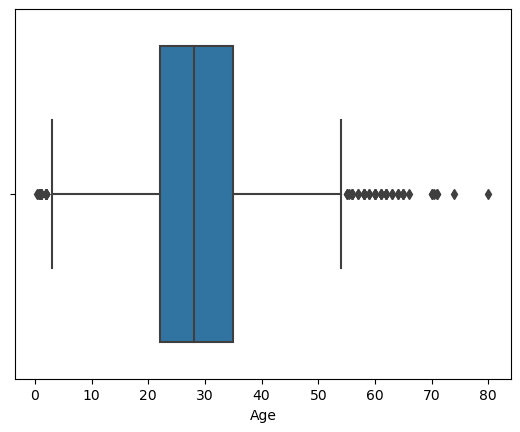

In [15]:
sns.boxplot(x="Age",data=df)

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range= Q1 - (1.5 * IQR)
    upper_range= Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [17]:
lowage,uppage=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>uppage,uppage,df['Age'])
df['Age']=np.where(df['Age']<lowage,lowage,df['Age'])

<AxesSubplot:xlabel='Age'>

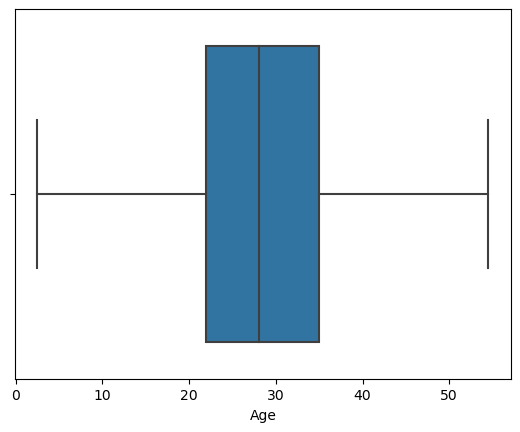

In [18]:
sns.boxplot(x="Age",data=df)

<AxesSubplot:xlabel='Fare'>

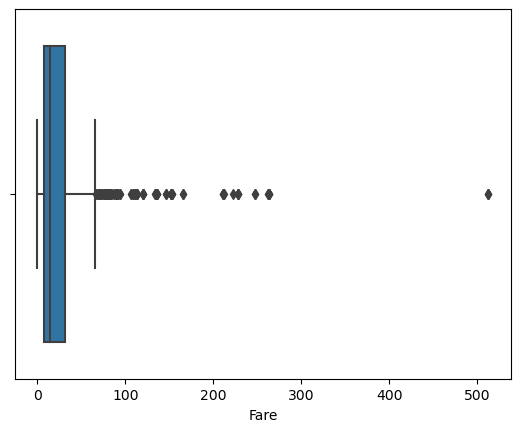

In [19]:
sns.boxplot(x="Fare",data=df)

<AxesSubplot:xlabel='Fare'>

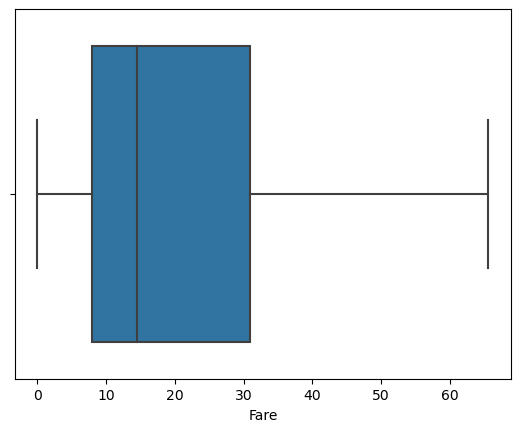

In [20]:
lowfare,uppfare=remove_outlier(df['Fare'])
df['Fare']=np.where(df['Fare']>uppfare,uppfare,df['Fare'])
df['Fare']=np.where(df['Fare']<lowfare,lowfare,df['Fare'])
sns.boxplot(x="Fare",data=df)

In [21]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])

In [22]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_28.0,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,1
1,1,1,38.0,1,0,65.6344,1,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,1


In [23]:
df.shape

(891, 12)